Import libraries and load in csv files to dataframes

In [ ]:
from ipywidgets.widgets.interaction import interactive
import gzip
import json
import string
import re
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import numbers
import nltk # imports the natural language toolkit
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DataanalysisFinal/ColabNotebooks/uploaded



/content/drive/.shortcut-targets-by-id/17hopGjzDAYQSbJPqdSHBLX4sp4xdSrp3/DataanalysisFinal/ColabNotebooks/uploaded


In [ ]:
Airbnb=pd.read_csv("listings.csv")
# Airbnb=Airbnb.groupby(").agg("mean")
Airbnb

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59819,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",0,1.0,Real Bed,1.0,1.0,flexible,silver spring,NaN,...,9.0,8.0,9.0,8.0,80.0,9.0,Private room,MD,NaN,20910
59820,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",20,1.0,Real Bed,1.0,2.0,flexible,bethesda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,MD,NaN,20816
59821,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",13,1.0,Real Bed,1.0,3.0,strict,temple hills,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,MD,NaN,20748
59822,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",12,1.0,Real Bed,1.0,1.0,moderate,silver spring,NaN,...,10.0,9.0,10.0,10.0,100.0,10.0,Entire home/apt,MD,NaN,20910


In [ ]:
demo=pd.read_csv("demographics.csv")
demo

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
0,601,17982,1006,1080,1342,1352,1321,2253,2149,2434,...,48.1,12,12.8,8.6,8.7,6.2,1.4,16.3,10816,20349
1,602,40260,2006,2440,2421,2953,2865,5124,5139,5947,...,31.4,16.3,17.9,12.2,10.6,7.7,2.9,21.2,16079,23282
2,603,52408,2664,3177,3351,3685,3585,6473,6775,6678,...,31,14.9,17.5,11.7,10.8,8.7,2.4,21.9,16804,26820
3,606,6331,347,331,461,474,469,707,933,776,...,45.3,10.2,20,11.7,11,1.8,0,12.8,12512,15730
4,610,28328,1438,1490,2044,2122,1985,3358,3778,3858,...,26.9,14.8,23.7,15.2,9.3,7.5,1.6,18.4,17475,23360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,99923,13,0,0,0,0,0,0,0,0,...,0,46.2,53.8,0,0,0,0,0,-,N
33116,99925,826,65,50,47,36,60,86,82,111,...,7.1,6.2,21.2,11.1,12.6,17.5,9.5,39.6,38594,52706
33117,99926,1711,161,124,140,113,107,224,182,236,...,5.5,1.9,14.1,11.1,16.8,14.5,12,43.3,51071,71580
33118,99927,123,0,0,0,0,0,0,32,22,...,28.2,0,23.1,15.4,25.6,0,0,25.6,19861,35617


In [ ]:
Estate=pd.read_csv("econ_state.csv")
Estate

,state,2005Q1_gdp,2005Q2_gdp,2005Q3_gdp,2005Q4_gdp,2006Q1_gdp,2006Q2_gdp,2006Q3_gdp,2006Q4_gdp,2007Q1_gdp,...,2016/03_ur,2016/04_ur,2016/05_ur,2016/06_ur,2016/07_ur,2016/08_ur,2016/09_ur,2016/10_ur,2016/11_ur,2016/12_ur
0,AL,153332,155940,157437,160293,161934,163974,165470,166495,166821,...,6.6,6.6,6.6,6.7,6.7,6.7,6.6,6.6,6.6,6.6
1,AK,37517,38907,40691,43138,42872,44653,45349,45840,46658,...,5.9,5.8,5.8,5.8,5.8,5.9,6.0,6.1,6.2,6.3
2,AZ,218206,224496,231629,235099,241787,244659,250886,256505,258078,...,4.1,4.1,4.1,4.1,4.0,4.0,4.0,4.0,4.0,3.9
3,AR,88446,89264,90515,93050,93413,95259,95481,95203,94289,...,5.5,5.4,5.3,5.3,5.2,5.1,5.1,5.0,5.0,5.0
4,CA,1722091,1747827,1787427,1809426,1857944,1865835,1886549,1907754,1915172,...,5.6,5.5,5.5,5.5,5.4,5.4,5.3,5.3,5.3,5.2
5,CO,216906,218710,222780,223421,229476,229632,234160,234411,237933,...,3.3,3.3,3.4,3.4,3.4,3.3,3.2,3.1,3.0,3.0
6,CT,207262,210134,210233,213052,221025,220596,220677,223380,235095,...,5.4,5.4,5.3,5.2,5.1,4.9,4.8,4.6,4.5,4.4
7,DE,52121,51156,51480,58232,55333,56670,56397,55606,56466,...,6.2,6.1,6.1,6.1,6.0,6.0,5.9,5.8,5.8,5.7
8,DC,82522,83530,83845,84446,86260,86981,89166,87577,90741,...,4.4,4.4,4.4,4.4,4.4,4.3,4.3,4.3,4.3,4.3
9,FL,680384,690146,713393,717145,733443,740698,747163,763377,760435,...,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9


In [ ]:
venue = pd.read_csv("venues.csv.gz", compression='gzip')

venue.columns

Index(['city', 'id', 'latitude', 'longitude', 'name', 'rating', 'types'], dtype='object')

In [ ]:
RE = pd.read_csv("real_estate.csv.gz", compression="gzip")

a_states = Airbnb['state'].unique()
RE = RE[RE['state'].isin(a_states)]


RE

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700
8,ZHVI,11226,New York,NY,New York,Kings,9,NaN,NaN,NaN,...,583600,594800,605200,612100.0,612800,616900,628900,644200,653500,658700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29101,ZRI,12429,Port Ewen,NY,Kingston,Ulster,15902,NaN,NaN,NaN,...,1534,1533,1542,1561.0,1583,1595,1605,1612,1618,1621
29102,ZRI,20687,Scotland,MD,California-Lexington Park,Saint Marys,15903,NaN,NaN,NaN,...,1363,1348,1333,1323.0,1335,1371,1398,1391,1347,1300
29106,ZRI,12720,Bethel,NY,NaN,Sullivan,15907,NaN,NaN,NaN,...,1185,1181,1174,1167.0,1156,1162,1175,1194,1202,1206
29107,ZRI,1338,Shelburne Falls,MA,Greenfield Town,Franklin,15908,NaN,NaN,NaN,...,1769,1772,1775,1780.0,1786,1790,1797,1798,1796,1795


Remove all Columns pre 2005 to match Estate Dataframe to compare total amount generated by airbnb's by the gdp of the state per quarter

then create plots to see if there is a correlation between average gdp of a state and the money being generated by their airbnb's

In [ ]:
listOfCol=RE.columns

for i in listOfCol[7:]:
  test=i.split("-") 
  if(int(test[0])<2005):
     RE=RE.drop(columns=[i])
RE



,type,zipcode,city,state,metro,county,size_rank,2005-01,2005-02,2005-03,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,307200.0,309900.0,310900.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,373100.0,375200.0,376700.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,224300.0,225100.0,226200.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700
8,ZHVI,11226,New York,NY,New York,Kings,9,323400.0,323600.0,335300.0,...,583600,594800,605200,612100.0,612800,616900,628900,644200,653500,658700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29101,ZRI,12429,Port Ewen,NY,Kingston,Ulster,15902,NaN,NaN,NaN,...,1534,1533,1542,1561.0,1583,1595,1605,1612,1618,1621
29102,ZRI,20687,Scotland,MD,California-Lexington Park,Saint Marys,15903,NaN,NaN,NaN,...,1363,1348,1333,1323.0,1335,1371,1398,1391,1347,1300
29106,ZRI,12720,Bethel,NY,NaN,Sullivan,15907,NaN,NaN,NaN,...,1185,1181,1174,1167.0,1156,1162,1175,1194,1202,1206
29107,ZRI,1338,Shelburne Falls,MA,Greenfield Town,Franklin,15908,NaN,NaN,NaN,...,1769,1772,1775,1780.0,1786,1790,1797,1798,1796,1795


grouping months by quarters
January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4)

In [ ]:


RE = RE.loc[:, :"2016-09"]
RE.columns





for i in RE.columns[7:]:
  test=i.split("-") 
  if(int(test[1])<4 and int(test[1])>0):
    RE.rename(columns = {i:str(test[0])+"Q1"}, inplace = True)
  elif(int(test[1])<7 and int(test[1])>3):
   RE.rename(columns = {i:str(test[0])+"Q2"}, inplace = True)
  elif(int(test[1])<10 and int(test[1])>6):
   RE.rename(columns = {i:str(test[0])+"Q3"}, inplace = True)
  elif(int(test[1])<=12 and int(test[1])>9):
    RE.rename(columns = {i:str(test[0])+"Q4"}, inplace = True)


  
RE


,type,zipcode,city,state,metro,county,size_rank,2005Q1,2005Q1,2005Q1,...,2015Q4,2016Q1,2016Q1,2016Q1,2016Q2,2016Q2,2016Q2,2016Q3,2016Q3,2016Q3
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,993700,1007800,1031000.0,1055800.0,1063500.0,1062900.0,1080800,1109400,1132500,1137500
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,307200.0,309900.0,310900.0,...,311600,311800,313100.0,315000.0,317000.0,317500.0,317500,317900,318600,318200
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,373100.0,375200.0,376700.0,...,390300,393200,397200.0,400500.0,404000.0,403500.0,401400,400100,400700,401900
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,224300.0,225100.0,226200.0,...,195900,196000,196000.0,195600.0,195800.0,195700.0,197500,199600,199900,198800
8,ZHVI,11226,New York,NY,New York,Kings,9,323400.0,323600.0,335300.0,...,528300,530600,534600.0,536600.0,538100.0,545600.0,556100,564600,572800,583600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29101,ZRI,12429,Port Ewen,NY,Kingston,Ulster,15902,NaN,NaN,NaN,...,1418,1428,1443.0,1459.0,1472.0,1481.0,1497,1515,1530,1534
29102,ZRI,20687,Scotland,MD,California-Lexington Park,Saint Marys,15903,NaN,NaN,NaN,...,1294,1293,1292.0,1300.0,1313.0,1343.0,1371,1371,1368,1363
29106,ZRI,12720,Bethel,NY,NaN,Sullivan,15907,NaN,NaN,NaN,...,1206,1226,1236.0,1234.0,1222.0,1212.0,1204,1201,1191,1185
29107,ZRI,1338,Shelburne Falls,MA,Greenfield Town,Franklin,15908,NaN,NaN,NaN,...,1700,1692,1701.0,1713.0,1735.0,1750.0,1767,1772,1774,1769


merging the quarters by year

In [ ]:
ListOfStateNames = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
ListOfStateAbb = [ 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY' ];

RE=RE.groupby(RE.columns, axis=1).sum()
RE
 


,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,...,2016Q1,2016Q2,2016Q3,city,county,metro,size_rank,state,type,zipcode
0,0.0,0.0,678400.0,2056500.0,2107100.0,2219900.0,2277300.0,2291000.0,2301100.0,2195400.0,...,3094600.0,3207200.0,3379400,New York,New York,New York,1,NY,ZHVI,10025
1,928000.0,934200.0,940600.0,954500.0,965600.0,961100.0,956000.0,954200.0,955800.0,961600.0,...,939900.0,952000.0,954700,Chicago,Cook,Chicago,2,IL,ZHVI,60657
2,1125000.0,1141200.0,1140400.0,1143200.0,1155000.0,1153400.0,1153200.0,1159100.0,1160400.0,1172100.0,...,1190900.0,1208900.0,1202700,Chicago,Cook,Chicago,3,IL,ZHVI,60614
4,675600.0,678500.0,683300.0,685700.0,695300.0,700100.0,702900.0,706800.0,712400.0,712500.0,...,587600.0,589000.0,598300,Chicago,Cook,Chicago,5,IL,ZHVI,60640
8,982300.0,988700.0,963200.0,1042900.0,1130000.0,1175200.0,1221900.0,1246800.0,1258600.0,1270800.0,...,1601800.0,1639800.0,1721000,New York,Kings,New York,9,NY,ZHVI,11226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4330.0,4450.0,4579,Port Ewen,Ulster,Kingston,15902,NY,ZRI,12429
29102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3885.0,4027.0,4102,Scotland,Saint Marys,California-Lexington Park,15903,MD,ZRI,20687
29106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3696.0,3638.0,3577,Bethel,Sullivan,0,15907,NY,ZRI,12720
29107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5106.0,5252.0,5315,Shelburne Falls,Franklin,Greenfield Town,15908,MA,ZRI,1338


group by state

In [ ]:
idx = RE[RE['state'] == 'NJ'].index
RE=RE.drop(columns=["size_rank","zipcode"])
RE = RE.drop(idx)
RE=RE.groupby(RE["state"], axis=0).sum()

RE_copy = RE.copy(deep=True)

RE_copy
 
 

,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,...,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3
state,,,,,,,,,,,,,,,,,,,,,
CO,163992000.0,166344500.0,168940600.0,171744500.0,173854900.0,175675800.0,177447800.0,179345000.0,181264200.0,182912800.0,...,202578105,207299270,212188146,217435820,224015021,230723255,236593236,241072746.0,246400863.0,252269154
DC,23976300.0,24660500.0,25266600.0,25666100.0,26031600.0,26140600.0,26157400.0,26133300.0,26173600.0,26301500.0,...,31836812,32251241,32500056,32792731,33750612,34702725,35188536,35193916.0,35440706.0,35936994
IL,301630600.0,307193600.0,312221200.0,317624400.0,322737100.0,326042200.0,328352100.0,329976900.0,331169900.0,330583700.0,...,282016391,284149925,285605254,286522574,289595389,291197855,292653962,294673818.0,297824853.0,299808353
MA,484551200.0,492679300.0,496471000.0,498345700.0,496773300.0,494882500.0,488983800.0,483226200.0,479318900.0,476788100.0,...,467580021,474522088,481668635,486214454,492096386,499527258,506078170,511852309.0,517182042.0,523632914
MD,290127900.0,304380700.0,319141200.0,331775300.0,339735200.0,345154700.0,347041800.0,346755700.0,345914200.0,345570400.0,...,297473853,300611841,301848536,301700316,303612312,305276326,306209426,307512723.0,310731960.0,312476587
NY,678756900.0,700273900.0,717422900.0,737776400.0,752224900.0,766967400.0,773169600.0,774065500.0,771700200.0,770258200.0,...,760011084,769007027,774449080,779991698,789019172,799658578,812366040,821190796.0,830699841.0,840551140
VT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,345159,341128,353074,359105,368550,384408,386426,387234.0,389487.0,390763


Display the quarterly gdp statistics of the states 

In [ ]:

Estate = Estate[Estate['state'].isin(a_states)]
idx = Estate[Estate['state'] == 'NJ'].index
Estate = Estate.drop(idx)



# filter out "ur" labeled columns
for col in Estate.columns[1:]:
  split = col.split("_")
  if(split[1] == "ur"):
    Estate = Estate.drop([col], axis = 1)

# filter out "personal_income" labeled columns pre 2005
for col in Estate.columns[1:]:
  split = col.split("Q")
  if(int(split[0])<2005):
    Estate = Estate.drop([col], axis = 1)

incomes = [col for col in Estate.columns if 'personal' in col]
personal_income_df = pd.DataFrame()
personal_income_df['state'] = Estate['state']

for i in incomes:
  personal_income_df[i] = Estate[i]

for col in Estate.columns[1:]:
  split = col.split("_")
  if(split[1] == "personal"):
    Estate=Estate.drop([col], axis=1)




Estate.set_index('state', drop = True, inplace=True)
for i in Estate.columns:
  splits = i.split("_")
  Estate.rename(columns = {i:str(splits[0])}, inplace = True)



Estate

,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,...,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3
state,,,,,,,,,,,,,,,,,,,,,
CO,216906,218710,222780,223421,229476,229632,234160,234411,237933,243280,...,302074,308529,312554,309638,314149,315224,315983,316443,319939,325447
DC,82522,83530,83845,84446,86260,86981,89166,87577,90741,91500,...,115337,116679,118075,120645,122217,122571,123149,125414,126484,128063
IL,578667,582842,591622,592637,615525,616144,620846,632411,640519,644089,...,742655,751996,759285,767643,770572,784199,785112,791714,797637,805876
MD,256743,260562,267518,270412,273950,275749,279362,281476,282680,286830,...,348074,353822,354619,360962,363393,366162,370908,369056,371812,376010
MA,340432,342535,348151,349117,354949,359528,358472,369278,372780,376880,...,449079,460750,467357,476742,483866,484812,494352,494190,498685,505121
NY,996072,1017192,1031009,1049458,1070271,1071568,1074253,1095471,1135567,1109354,...,1372230,1389977,1406859,1412184,1431902,1450379,1439659,1465941,1474777,1494116
VT,23276,23371,23584,23924,24217,24380,24411,24268,24510,24808,...,28959,29516,29975,29701,29813,30360,30279,30734,30990,31370


In [ ]:
 
meanOfRE=RE.mean()
TotalMean=meanOfRE.mean(axis=0)
TotalMean



288080721.7386018

percent Change line graph of Real Estate

<function matplotlib.pyplot.show(*args, **kw)>

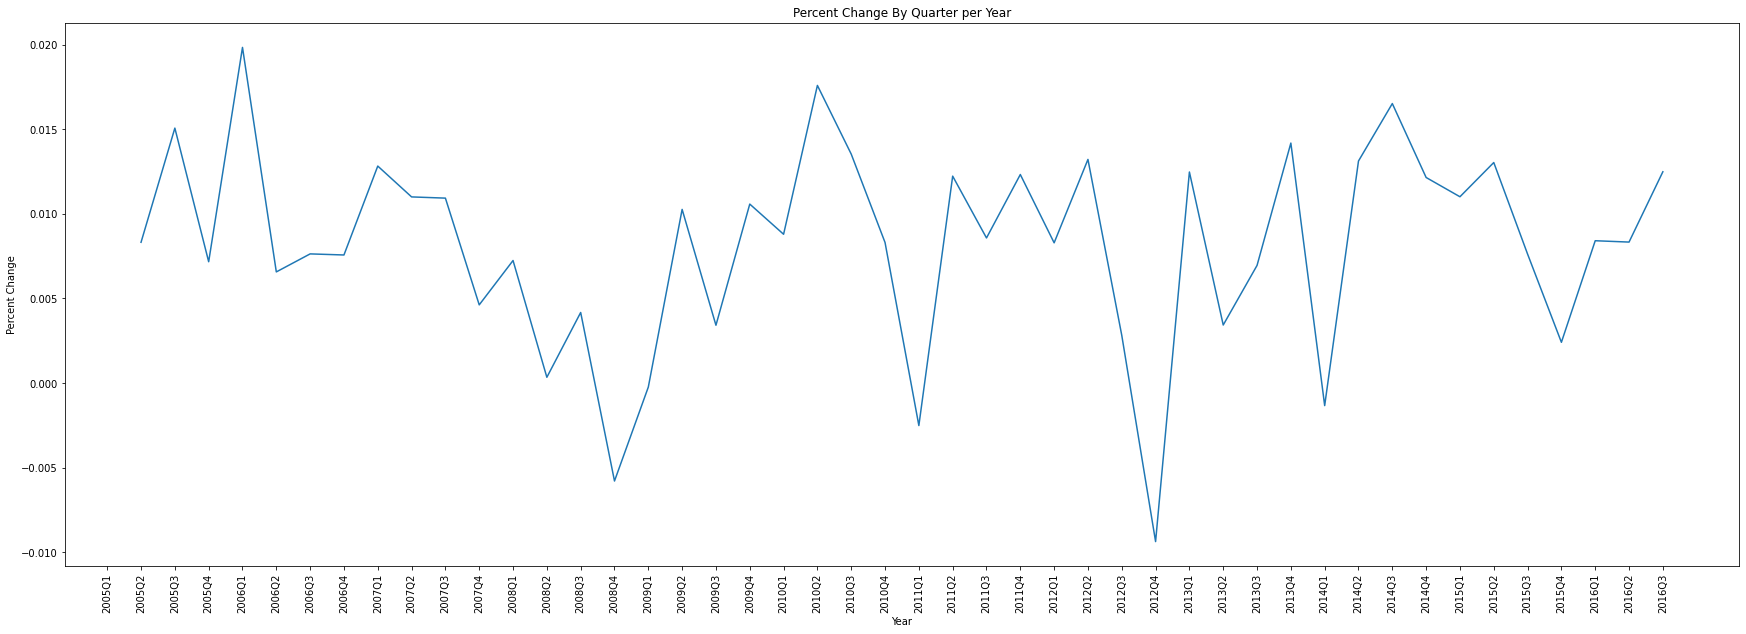

In [ ]:
temp=RE.dropna()




ROCRE=temp.pct_change(periods=1,axis=1)
ROCRE=ROCRE.median()

temp1=Estate.dropna()
ROCES=temp1.pct_change(periods=1,axis=1)
ROCES=ROCES.median()

fig,ax= plt.subplots(figsize=(30, 10))
ROCES.plot()
plt.xticks(range(len(ROCES.index)),ROCES.index)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.title("Percent Change By Quarter per Year")
plt.show

creating a line graph to see the change over time in comparison for the first quarter

<function matplotlib.pyplot.show(*args, **kw)>

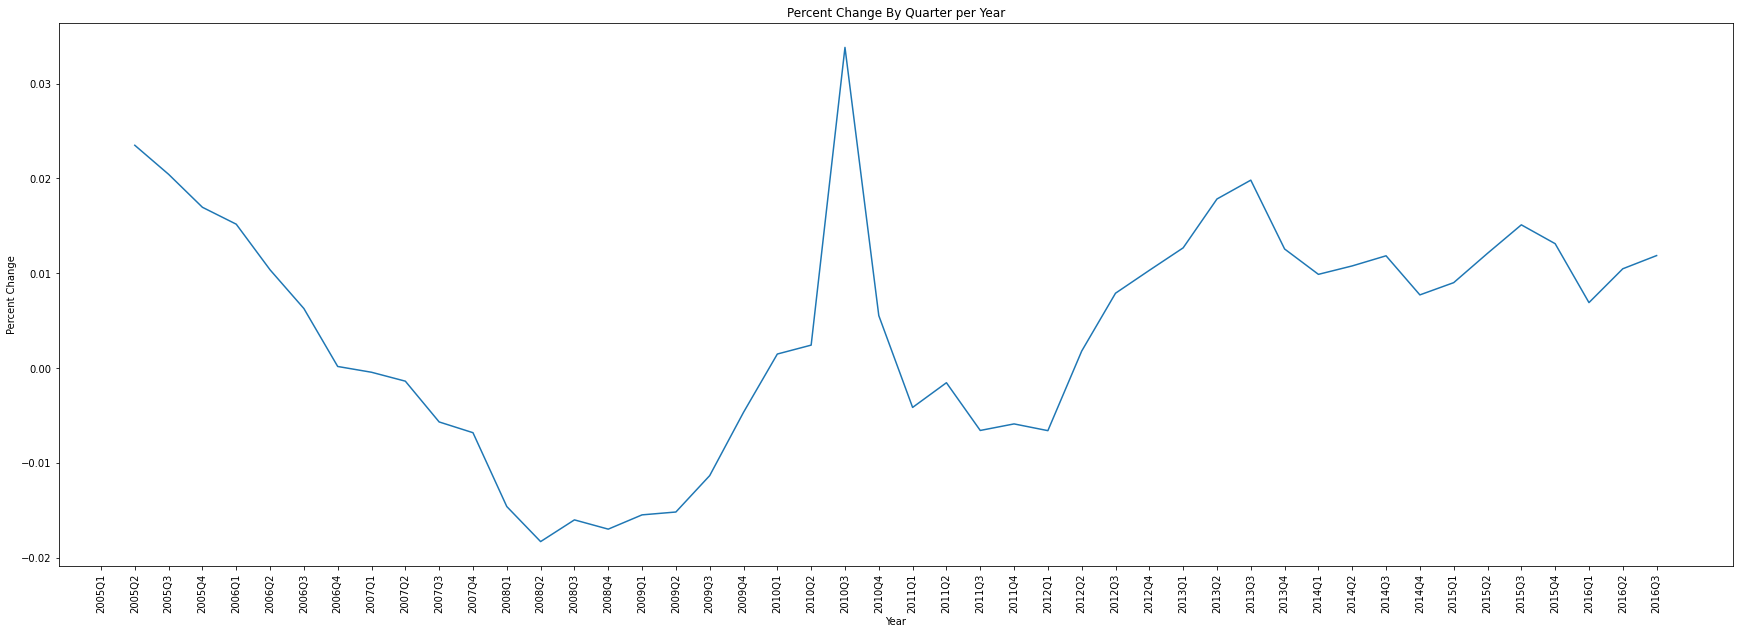

In [ ]:
fig,ax= plt.subplots(figsize=(30, 10))
ROCRE.plot()
plt.xticks(range(len(ROCRE.index)),ROCRE.index)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.title("Percent Change By Quarter per Year")
plt.show

In [ ]:


ROCES=pd.Series(ROCES,name="ROCES")
ROCRE=pd.Series(ROCRE,name="ROCRE")
ROCES.corr(ROCRE)

0.3248539034428543

In [ ]:
fig = px.choropleth(RE,
                    locations=RE.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2014Q1',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [ ]:
fig = px.choropleth(Estate,
                    locations=Estate.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2014Q1',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [ ]:
fig = px.choropleth(RE,
                    locations=RE.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2016Q3',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [ ]:
fig = px.choropleth(Estate,
                    locations=Estate.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2016Q3',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

Transforming the Airbnb dataframe, dropping un-needed columns and aggregating the median of days booked for Airbnb's per state

In [ ]:
Airbnb.columns
idx = Airbnb[Airbnb['state'] == 'MP'].index
Airbnb = Airbnb.drop(idx)
idx = Airbnb[Airbnb['state'] == 'NJ'].index
Airbnb = Airbnb.drop(idx)

newtemp=Airbnb.drop(columns=['accommodates', 'amenities', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type','weekly_price','zipcode'])
newtemp=30-newtemp.groupby("state").agg("median")
newtemp

,availability_30
state,
CO,24.0
DC,25.0
IL,21.0
MA,26.0
MD,10.0
NY,28.0
VT,1.0


In [ ]:
fig = px.choropleth(newtemp,
                    locations=newtemp.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='availability_30',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

Performing Linear Regression Testing on the median GDPs of states and the median bookings of Airbnb's in each state

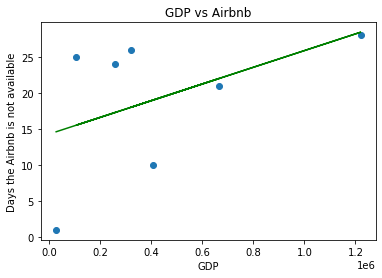

The Correlation Coefficent between the mean GDP and availabilty per state is: 0.47043690776692443


In [ ]:
copy_econ = Estate.copy(deep=True)
copy_econ['median'] = Estate.median(axis=1)

X = copy_econ['median'].values.reshape(-1,1)
Y = newtemp['availability_30'].values.reshape(-1,1)
regress = LinearRegression()
regress.fit(X,Y)
Y_predictor = regress.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_predictor, color='green')
plt.xlabel("GDP")
plt.ylabel("Days the Airbnb is not available")
plt.title("GDP vs Airbnb")
plt.show()

corr = np.corrcoef(copy_econ['median'], newtemp['availability_30'])
print(f"The Correlation Coefficent between the mean GDP and availabilty per state is: {corr[0][1]}")

# copy_econ['mean']

# plt.scatter(x = copy_econ['mean'], y = newtemp['availability_30'])
# plt.xlabel('Average Availability')
# plt.ylabel('Average GDP')

Performing Linear Regression Testing on the total quarterly house values in all of the state vs the total quarterly gdp of the state

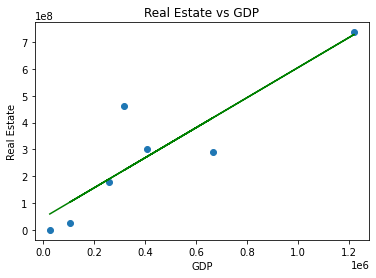

The Correlation Coefficent between the quarterly median GDP and quarterly median real estate price per state is: 0.8876901299735239


In [ ]:
copy_econ = Estate.copy(deep=True)
copy_econ['median'] = Estate.median(axis=1)
RE_copy['median'] = RE_copy.median(axis=1)

X = copy_econ['median'].values.reshape(-1,1)
Y = RE_copy['median'].values.reshape(-1,1)

regress = LinearRegression()
regress.fit(X,Y)
Y_predictor = regress.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_predictor, color='green')
plt.xlabel("GDP")
plt.ylabel("Real Estate")
plt.title("Real Estate vs GDP")
plt.show()

corr = np.corrcoef(copy_econ['median'], RE_copy['median'])
print(f"The Correlation Coefficent between the quarterly median GDP and quarterly median real estate price per state is: {corr[0][1]}")

Performing Linear Regression Testing on the total median real estate prices per state and the median days booked of airbnb's in the state

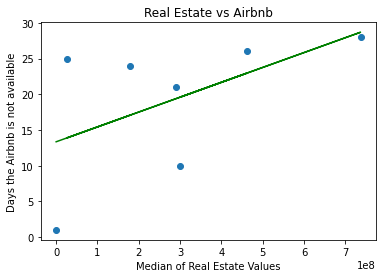

The Correlation Coefficent between the median days booked of Airbnb's in each state and quarterly median real estate price per state is: 0.5346084266449262


In [ ]:

RE_copy['median'] = RE_copy.median(axis=1)

Y = newtemp['availability_30'].values.reshape(-1,1)
X = RE_copy['median'].values.reshape(-1,1)

regress = LinearRegression()
regress.fit(X,Y)
Y_predictor = regress.predict(X)
plt.scatter(X,Y)

plt.plot(X,Y_predictor, color='green')
plt.xlabel("Median of Real Estate Values")
plt.ylabel("Days the Airbnb is not available")
plt.title("Real Estate vs Airbnb")
plt.show()

corr = np.corrcoef(newtemp['availability_30'],RE_copy['median'])
print(f"The Correlation Coefficent between the median days booked of Airbnb's in each state and quarterly median real estate price per state is: {corr[0][1]}")